### Crystal Piroozy Posey

#### Fall 2020 Python Final Project

#### *Implementing Python to allow the user input function to calculate State Funded Sites monitoring well's PFOA + PFOS levels, their Health Adivsory Levels (HAL), and identify one type of sensitive receptor (hospitals) within a one mile radius of identified PFAS contaminated sites using spatial data in Northeast Florida.*

In [118]:
import pandas as pd
import numpy as np
import os
import math
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import datasets

## **What is PFAS and why should it be studied?**

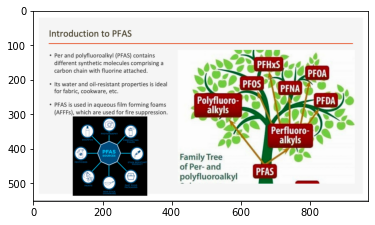

In [174]:
#reading a image of a powerpoint slide
Intro_PFAS = mpimg.imread('IntroPFAS_Slide.png')
plt.imshow(Intro_PFAS)

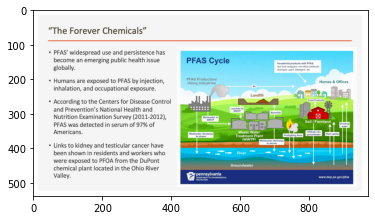

In [120]:
PFAS_4ever = mpimg.imread('Forever_Chemical_Slide.png')
plt.imshow(PFAS_4ever)

###### PFAS, explained: https://www.youtube.com/watch?v=PPfAASASbuM&t=100s

###### It is important to study PFAS because of its abundance in the environment and its effects on the human body. Spatial data can provide an opportunity for scientists to observe the locations of the PFAS sites and their respective distances to sensitive receptors, such as group care facilities, daycares, nursing homes, and hospitals. 

###### The Health Advisory Level (HAL) for PFOA + PFOS is 70 parts per trillion or 0.07 µg/L. That can be compared to a droplet of water in a pool. HAL are non-enforceable and non-regulatory.

###### **Source**: https://www.epa.gov/ground-water-and-drinking-water/drinking-water-health-advisories-pfoa-and-pfos

###### Python can provide a user friendly application to input PFAS data and its coordinates to calculate and present the PFAS levels and their spatial distances in this particular project. It will minimize human error and the repetitive observation to find the sensitive receptors in the given radius for each PFAS site


###### All this information can be used to identify and inform the sensitive receptors of PFAS contamination in the area and provide another source of drinking water while the site is remediated. 

**Literature Sources:** 

Aly, N.A., Luo, Y., Liu, Y., Casillas, G., McDonald, T., Kaihatu, J. M., Jun, M., Ellis, N., Gossett, S., Dodds, J., Baker, E., Bhandari, S., Chiu, W., and Rusyn, I. 2020. Temporal and spatial analysis of per and polyfluoroalkyl substances in surface waters of Houston ship channel following a large-scale industrial fire incident. *Environmental Pollution*,265: Part B.

## --------------------------------------------------------------------------------------------

### **Objectives:**
1. Unify the Coordinate Reference System/Datum as WGS 1984 in ArcCatalog.
2. Create a dataframe of State Funded Sites in the Northeast (NE) of Florida that are listed on the Florida Department of Environmental Protection's website.
3. Utilize the Pandas module to open, read, and populate a csv file that contains spatial data of hospitals in the NE of Florida.
4. Create a def function to have the user input function to input coordinates of the State Funded Sites, in order to calculate the distances to the hospitals using the haversine formula.
5. Use the .loc conditional selection to locate hospitals within one mile of the State Funded Site.
6. Generate a def function to allow the user to input and calculate the PFOA + PFOS levels and express if the PFOA + PFOS values are above the Health Advisory Level (HAL) through chained conditionals, such as if and else statements.
7. Produce a map that exhibits the State Funded Site, its one mile radius boundary, and the hospitals that are within that radius.

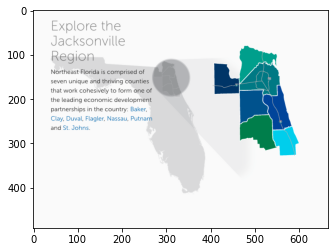

In [121]:
#Introduce the study area. 
NE_FL = mpimg.imread('NE_FL.png')
plt.imshow(NE_FL)

Source: https://jaxusa.org/the-region/

### Study Site: Northeast Florida 
   - Nassau
   - Baker
   - Duval 
   - Clay
   - St. Johns
   - Putnam
   - Flagler

## **What is the Haversine Formula?**

##### The haversine formula calculates the distances between two points on the surface of a spherical globe. It is important to note that distance formulas on a flat plane are not beneficial for longitude or latitude coordinates because spherical geometry is considered in those values and after 20 km, flat plane formulas start to contain errors. 

The haversine formula can be defined as:

φ = Latitude

λ = Longitude

- a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)
- c = 2 * atan2( √a, √(1−a) )
- d = RadiusoftheEarth ⋅ c

Source: https://community.esri.com/t5/coordinate-reference-systems/distance-on-a-sphere-the-haversine-formula/ba-p/902128

## **1. Unify the Coordinate Reference System/Datum as WGS 1984 in ArcCatalog.**

In [122]:
#The shapefile's (PFAS Jax Sites and Hospitals) CRS were converted through ArcCatalog and in ArcMap the xy coordinates were obtained and added in the attribute table through the XY Coordinate feature. The attribute table was then exported as a csv excel file to be used later in the project.

## **2. Create a dataframe of State Funded Sites in the Northeast (NE) of Florida that are listed on the Florida Department of Environmental Protection's website.**

In [123]:
#The list of PFAS sites in the NE region was obtained from the FDEP Waste Cleanup site and a dataframe was created with excel coordinates from the shapefile imported from the Florida Geographic Data Library. The dataframe will be used as a reference.
PFAS_Jax = pd.DataFrame({
        "Longitude":[-81.7500582, -81.5202199, -81.34156195, -81.65231461, -81.68906907],
        "Latitude":[30.32525287, 29.9758579, 29.94951415, 30.33436401, 30.32256198],
    },
    index = ["Eagle - Picher Industries Facility","Silvex", "Washac Industries", "960 North Market Street Inc", "Jackson Atomics - Former"]
)
PFAS_Jax

,Longitude,Latitude
Eagle - Picher Industries Facility,-81.750058,30.325253
Silvex,-81.520220,29.975858
Washac Industries,-81.341562,29.949514
960 North Market Street Inc,-81.652315,30.334364
Jackson Atomics - Former,-81.689069,30.322562


## **3. Utilize the Pandas module to open, read, and populate a csv file that contains spatial data of hospitals in the NE of Florida**

In [135]:
#read and open head of csv file for hospitals obtained from the attribute table in the shapefile. 
file = open("Hospitals_FL_final.csv", mode="r")
hospitals = pd.read_csv(file)
hospitals.head()

,OID,PARCELID,FDEM_ID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,TYPE,...,GCID,ACRES,DESCRIPT,FLAG,UPDATE_DAY,FGDLAQDATE,AUTOID,DDLat,DDLon,ORIG_OID
0,1,00434430220000000,NaN,SELECT SPECIALTY HOSPITAL - PALM BEACH,3060 MELALEAUCA LANE,LAKE WORTH,33461,PALM BEACH,561-357-7200,HOSPITALS - ACUTE CARE,...,107,6.497861,SELECT SPECIALTY HOSPITAL - PALM BEACH,V,2011-05-10,2017-09-06,1,26.608919,-80.091679,1
1,2,331S303000000070,NaN,SELECT SPECIALTY HOSPITAL - PENSACOLA,7000 COBBLE CREEK DR,PENSACOLA,32504,ESCAMBIA,850-473-4800,HOSPITALS - ACUTE CARE,...,108,7.616746,SELECT SPECIALTY HOSPITAL - PENSACOLA,V,2016-05-17,2017-09-06,2,30.478638,-87.215526,2
2,3,21084-000-000,NaN,SELECT SPECIALTY HOSPITAL - PANAMA CITY,615 N BONITA AVE (3RD FLOOR OF BAY MEDICAL CEN...,PANAMA CITY,32401,BAY,850-767-3180,HOSPITALS - ACUTE CARE,...,109,28.863478,SELECT SPECIALTY HOSPITAL - PANAMA CITY,V,2012-11-19,2017-09-06,3,30.159341,-85.649909,3
3,4,0131350760010,NaN,JACKSON BEHAVIORAL HEALTH HOSPITAL,1695 NW 9TH AVE,MIAMI,33136,MIAMI-DADE,305-355-8234,HOSPITALS - PSYCHIATRIC,...,110,6.489612,JACKSON BEHAVIORAL HEALTH HOSPITAL,V,2016-05-17,2017-09-06,4,25.790859,-80.209588,4
4,5,0596010000R,NaN,NORTHEAST FLORIDA COMMUNITY HOSPICE - DR GASTO...,5450 RAMONA BLVD,JACKSONVILLE,32205,DUVAL,904-407-6132,HOSPITALS - HOSPICE,...,111,5.467964,NORTHEAST FLORIDA COMMUNITY HOSPICE - DR GASTO...,V,2011-05-10,2017-09-06,5,30.313656,-81.740249,5


### **Filtering out the hospitals in the Northeast of Florida.** 

Study area: Nassau, Baker, Duval, Clay, St. Johns, Putnam, and Flagler.

The csv file will be filtered to include only the above counties and a new csv file will be created. 

Source: https://www.ritchieng.com/pandas-multi-criteria-filtering/

In [136]:
#creating a list to be used to filter out counties from csv file and a new assignment is done to find hospitals in those counties from the csv file.
Hospitals_Jax_List = ['DUVAL', 'PUTNAM', 'FLAGLER', 'NASSAU', 'BAKER', 'CLAY', 'ST JOHNS']
hospitals_jax = hospitals[hospitals.COUNTY.isin(Hospitals_Jax_List)]

In [137]:
#convert to new csv

In [138]:
hospitals_jax.to_csv('hospital_jax.csv', index=False)

In [139]:
#read new csv file and present head. 
file1 = open("hospital_jax.csv", mode="r")
file2 = open("hospitals_jax.csv", mode="a")
hospitals_jax_csv = pd.read_csv(file1)
hospitals_jax_csv.head()

,OID,PARCELID,FDEM_ID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,TYPE,...,GCID,ACRES,DESCRIPT,FLAG,UPDATE_DAY,FGDLAQDATE,AUTOID,DDLat,DDLon,ORIG_OID
0,5,0596010000R,NaN,NORTHEAST FLORIDA COMMUNITY HOSPICE - DR GASTO...,5450 RAMONA BLVD,JACKSONVILLE,32205,DUVAL,904-407-6132,HOSPITALS - HOSPICE,...,111,5.467964,NORTHEAST FLORIDA COMMUNITY HOSPICE - DR GASTO...,V,2011-05-10,2017-09-06,5,30.313656,-81.740249,5
1,61,09-12-31-0000-02030-0020,NaN,FLORIDA HOSPITAL FLAGLER,60 MEMORIAL MEDICAL PKWY,PALM COAST,32164,FLAGLER,386-586-2000,HOSPITALS - ACUTE CARE,...,26,101.106337,FLORIDA HOSPITAL FLAGLER,V,2011-05-10,2017-09-06,61,29.479282,-81.189309,61
2,65,10-10-26-0000-0200-0010,10224938.0,PUTNAM COMMUNITY MEDICAL CENTER,611 ZEAGLER DR,PALATKA,32177,PUTNAM,386-328-5711,HOSPITALS - ACUTE CARE,...,30,31.647282,PUTNAM COMMUNITY MEDICAL CENTER,V,2016-05-17,2017-09-06,65,29.642414,-81.692435,65
3,69,1351200050,10225001.0,FLAGLER HOSPITAL,400 HEALTH PARK BLVD,ST AUGUSTINE,32086,ST JOHNS,904-819-5155,HOSPITALS - ACUTE CARE,...,34,61.113122,FLAGLER HOSPITAL,V,2016-05-17,2017-09-06,69,29.862930,-81.317184,69
4,71,38-06-26-017517-000-00,10225019.0,KINDRED HOSPITAL - NORTH FLORIDA,801 OAK ST,GREEN COVE SPRINGS,32043,CLAY,904-284-9230,HOSPITALS - ACUTE CARE,...,36,5.925119,KINDRED HOSPITAL - NORTH FLORIDA,V,2011-05-10,2017-09-06,71,29.988056,-81.682227,71


## **4. Create a def function to have the user input function to input coordinates of the State Funded Sites, in order to calculate the distances to the hospitals using the haversine formula and automatically update the csv file with those distances.**

In [144]:
#function is defined to input coordinates and each of those will be calculated to each hospital using the haversine formula to find the distances.
def distance_haversine ():

    #user input for PFAS State Funded Sites.
    
    pfas_lat2 = float(input('Latitude of PFAS Site: '))
    pfas_long2 = float(input('Longitude of PFAS Site: '))
    
    #assignment to each column of hospitals longitude and latitude.
    
    h_lat1 = hospitals_jax_csv['DDLat']
    h_long1 = hospitals_jax_csv['DDLon']
    
    #convert latitude and longitude points to radians.
    h_lat1_rad = h_lat1/(180/np.pi)
    h_lat2_rad = pfas_lat2/(180/np.pi)
    h_long1_rad = h_long1/(180/np.pi)
    h_long2_rad = pfas_long2/(180/np.pi)
    
    #haversine formula to calculate the distances from the user input coordinates to each hospitals
    # 3958.8 miles is the radius of the Earth.
    
    haver = np.sin((h_lat2_rad - h_lat1_rad)/2)**2 + np.cos(h_lat1_rad) * np.cos(h_lat2_rad) * np.sin((h_long2_rad - h_long1_rad)/2)**2
    sine = (2 * np.arctan2(np.sqrt(haver), np.sqrt(1-haver)))
    formula = 3958.8 * sine 
    
    # user input for name of facility. assignment is used to conduct the next step.
    name = input('Name of Facility:  ')
    
    # name assignment is included for the user input Name of Facility to name the new column the name. new column is for the distances that are calculated. 
    hospitals_jax_csv[name] = formula
    #a new csv file is created to include PFAS sites and their relative differences to each hospital, along with hospital information.
    updated = hospitals_jax_csv.to_csv("PFAS_Hospital_Jax.csv")
    #open and read new csv file
    updated_file = open("PFAS_Hospital_Jax.csv", mode="r")
    updated_file2 = pd.read_csv(updated_file)
    # return the head of the csv with calculated distance values and new column.
    return updated_file2.head()
    
    

#call function
distance_haversine()

Latitude of PFAS Site:  30.322562
Longitude of PFAS Site:  -81.689069
Name of Facility:   Jackson Atomics - Former


,Unnamed: 0,OID,PARCELID,FDEM_ID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,...,FGDLAQDATE,AUTOID,DDLat,DDLon,ORIG_OID,Eagle - Picher Industries Facility,Silvex\t,Washac Industries,960 North Market Street Inc,Jackson Atomics - Former
0,0,5,0596010000R,NaN,NORTHEAST FLORIDA COMMUNITY HOSPICE - DR GASTO...,5450 RAMONA BLVD,JACKSONVILLE,32205,DUVAL,904-407-6132,...,2017-09-06,5,30.313656,-81.740249,5,0.992146,26.787726,34.650204,5.436402,3.113987
1,1,61,09-12-31-0000-02030-0020,NaN,FLORIDA HOSPITAL FLAGLER,60 MEMORIAL MEDICAL PKWY,PALM COAST,32164,FLAGLER,386-586-2000,...,2017-09-06,61,29.479282,-81.189309,61,67.413744,39.641175,33.750449,65.265164,65.505001
2,2,65,10-10-26-0000-0200-0010,10224938.0,PUTNAM COMMUNITY MEDICAL CENTER,611 ZEAGLER DR,PALATKA,32177,PUTNAM,386-328-5711,...,2017-09-06,65,29.642414,-81.692435,65,47.306007,25.246644,29.880500,47.869920,46.994642
3,3,69,1351200050,10225001.0,FLAGLER HOSPITAL,400 HEALTH PARK BLVD,ST AUGUSTINE,32086,ST JOHNS,904-819-5155,...,2017-09-06,69,29.862930,-81.317184,69,41.110085,14.447233,6.158067,38.240561,38.766071
4,4,71,38-06-26-017517-000-00,10225019.0,KINDRED HOSPITAL - NORTH FLORIDA,801 OAK ST,GREEN COVE SPRINGS,32043,CLAY,904-284-9230,...,2017-09-06,71,29.988056,-81.682227,71,23.648101,9.732371,20.564010,23.994470,23.115983


In [160]:
#needs to be outside of the function in order for me to perform the .loc in the next step.
updated_file = open("PFAS_Hospital_Jax.csv", mode="r")
updated_file2 = pd.read_csv(updated_file)

## **5. Use the .loc conditional selection to locate hospitals within one mile of the State Funded Site.**

In [161]:
#.loc to locate hospitals and PFAS sites within 1 mile
updated_file2.loc[updated_file2["Eagle - Picher Industries Facility"]<=1]

,Unnamed: 0,OID,PARCELID,FDEM_ID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,...,FGDLAQDATE,AUTOID,DDLat,DDLon,ORIG_OID,Eagle - Picher Industries Facility,Silvex\t,Washac Industries,960 North Market Street Inc,Jackson Atomics - Former
0,0,5,0596010000R,NaN,NORTHEAST FLORIDA COMMUNITY HOSPICE - DR GASTO...,5450 RAMONA BLVD,JACKSONVILLE,32205,DUVAL,904-407-6132,...,2017-09-06,5,30.313656,-81.740249,5,0.992146,26.787726,34.650204,5.436402,3.113987


In [162]:
updated_file2.loc[updated_file2["Silvex\t"]<=1]

,Unnamed: 0,OID,PARCELID,FDEM_ID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,...,FGDLAQDATE,AUTOID,DDLat,DDLon,ORIG_OID,Eagle - Picher Industries Facility,Silvex\t,Washac Industries,960 North Market Street Inc,Jackson Atomics - Former


In [163]:
updated_file2.loc[updated_file2["Washac Industries"]<=1]

,Unnamed: 0,OID,PARCELID,FDEM_ID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,...,FGDLAQDATE,AUTOID,DDLat,DDLon,ORIG_OID,Eagle - Picher Industries Facility,Silvex\t,Washac Industries,960 North Market Street Inc,Jackson Atomics - Former


In [164]:
updated_file2.loc[updated_file2["960 North Market Street Inc"]<=1]

,Unnamed: 0,OID,PARCELID,FDEM_ID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,...,FGDLAQDATE,AUTOID,DDLat,DDLon,ORIG_OID,Eagle - Picher Industries Facility,Silvex\t,Washac Industries,960 North Market Street Inc,Jackson Atomics - Former


In [165]:
updated_file2.loc[updated_file2["Jackson Atomics - Former"]<=1]

,Unnamed: 0,OID,PARCELID,FDEM_ID,NAME,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,...,FGDLAQDATE,AUTOID,DDLat,DDLon,ORIG_OID,Eagle - Picher Industries Facility,Silvex\t,Washac Industries,960 North Market Street Inc,Jackson Atomics - Former


## **6. Generate a def function to allow the user to input and calculate the PFOA + PFOS levels and express if the PFOA + PFOS values are above the Health Advisory Level (HAL) through chained conditionals, such as if and else statements.**

In [167]:
#function to calculate PFOA + PFOS levels and print if its above or below HALs.
def PFAS_data ():
    #user input for PFOA and PFOS Labels
    PFOA = input('PFOA:  ')
    PFOS = input('PFOS:  ')
    #add the two value together
    PFAS = float(PFOA) + float(PFOS)
    #print result
    print('PFOA + PFOS level is: ', PFAS, 'µg/L.')
    
    #relational statement to print if above or below HAL
    if PFAS>=.07:
        print('PFAS levels above Health Advisory Levels (HALs)')
    else:
        print('PFAS levels below Health Advisory Levels (HALs)')
     
#call function
PFAS_data()

PFOA:   .05
PFOS:   .06


PFOA + PFOS level is:  0.11 µg/L.
PFAS levels above Health Advisory Levels (HALs)


## **7. Produce a map through the Folium module that exhibits the State Funded Site, its one mile radius boundary, and the hospital that are within that radius.**


Source: https://intro-to-code.readthedocs.io/en/latest/content/07-Folium.html

In [180]:
#create a map through folium by providing the coordinate points for the hospital and PFAS site that are within 1 mile radius. 
Jacksonville_SR = folium.Map(location = [30.313656, -81.740249], zoom_start=13)

#plot the pfas site and hospital that are within the radius using the spatial coordinates. 
folium.Marker([30.325253, -81.750058], popup='EAGLE - PICHER INDUSTRIES FACILITY', icon=folium.Icon(color= 'red')).add_to(Jacksonville_SR)
folium.Marker([30.313656, -81.740249], popup='NORTHEAST FLORIDA COMMUNITY HOSPICE - DR GASTO', icon=folium.Icon(color = 'green')).add_to(Jacksonville_SR)

#adding in the 1 mile or 1609.344 meters radius around the PFAS site.
folium.Circle(
    #properties of radius
    radius=1609.344, #in meters
    location=[30.325253, -81.750058], #1 mile/ 1609.344 meters radius around PFAS site.
    popup='Radius of Eagle - Picher Industries Facility',
    color='black'
#adding to the jacksonville map
).add_to(Jacksonville_SR)
#print map with PFAS site, Hospital, and radius around PFAS site.  
Jacksonville_SR


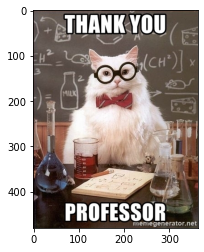

In [177]:
thankyou = mpimg.imread('thank-you-professor.png')
plt.imshow(thankyou)

## Thank you for a wonderful semester! I enjoyed this class a lot and I hope to continue learning more programming languages in the summer. You did amazing teaching this remotely and I hope to have another course with you in the future. 
## Best, 
## Crystal Posey

**Data Sources:**

**United States Environmental Protection Agency (EPA):**
The US EPA is a federal government organization that works to protect human health and the environment.
https://www.epa.gov/pfas

**Florida Department of Environmental Protection (FDEP) Geospatial Open Data:**
The FDEP Geospatial Open Data provides shapefiles and other geospatial data related to the work of FDEP.
https://geodata.dep.state.fl.us/datasets/florida-state-funded-cleanup-sites?geometry=-105.771%2C20.910%2C-60.288%2C34.480

**FDEP Waste Site Cleanup State Funded PFOA and PFOS Sampling Efforts:**
The FDEP Division of Waste Management routinely investigates known or suspected contamination for the state of Florida. They provide the public information and data on these contaminated sites. 
https://floridadep.gov/waste/waste-cleanup/content/waste-site-cleanup-state-funded-pfoa-and-pfos-sampling-efforts

**FGDL Metadata Explorer:**
The FGDL Metadata Explorer provides geospatial data from the Florida Geographic Data Library maintained at the University of Florida’s GeoPlan Center. 
Hospital Facilities in Florida – 2017: https://www.fgdl.org/metadataexplorer/full_metadata.jsp?docId=%7BAC4DB1B2-85C9-466A-A4C7-92C01C94702B%7D&loggedIn=false

**Matplotlib: Image tutorial:**
https://matplotlib.org/tutorials/introductory/images.html